In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [26]:
def visualize(info, show_limit=1000):
    history = info['history'][-show_limit:]
    closes = [data[2] for data in history]
    closes_index = [data[1] for data in history]
    # buy tick
    buy_tick = np.array([data[1] for data in history if data[0] == 0])
    buy_price = np.array([data[2] for data in history if data[0] == 0])
    sell_tick = np.array([data[1] for data in history if data[0] == 1])
    sell_price = np.array([data[2] for data in history if data[0] == 1])

    plt.figure(figsize=(14,10)) # change the figure size
    plt.plot(closes_index, closes)
    plt.scatter(buy_tick, buy_price - 3, c='g', marker="^", s=25)
    plt.scatter(sell_tick, sell_price + 3, c='r', marker="v", s=25)
    plt.show(block=True)
    time.sleep(3)

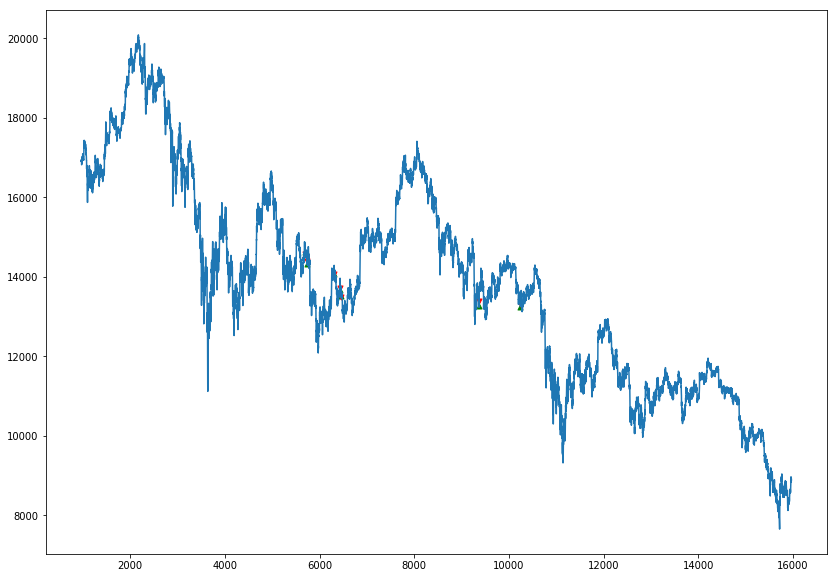

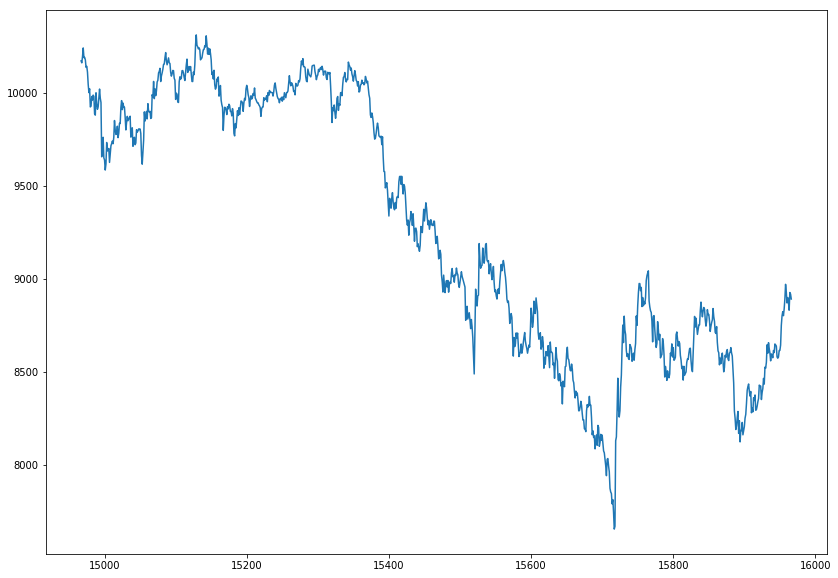

In [35]:
FILENAME = "./info/duel_dqn_OHLCV-v0_weights_1688662LS_0_7_0.6181420165052214.info"
info = np.load(FILENAME).all()
visualize(info, show_limit=15000)
visualize(info, show_limit=1000)

In [40]:
# plot cumulative return and max drawdown
def show_mdd(info): # xs is cumulative return / portfolio , if reward u should
    reward_history = [data[4] for data in info['history']]
    df = pd.DataFrame()
    df['reward'] = reward_history
    df['cum_reward'] = df['reward'].cumsum()
    xs = df['cum_reward'].values
    
    i = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
    j = np.argmax(xs[:i]) # start of period
    plt.figure(figsize=(16,10))
    plt.plot(xs)
    plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=10)
    plt.show()
    return xs[-1]
total_return = show_mdd(info)
print("total cumulative return : ",total_return)
print("portfolio value {0} -> {1}" .format(100*10000, info['portfolio']))

ValueError: attempt to get argmax of an empty sequence